# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("previsao_de_renda.csv")

In [3]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [5]:
df.drop(columns=["Unnamed: 0", "mau", "index", ], inplace=True)

In [7]:
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


In [8]:
df["data_ref"] = pd.to_datetime(df["data_ref"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   sexo                   15000 non-null  object        
 2   posse_de_veiculo       15000 non-null  bool          
 3   posse_de_imovel        15000 non-null  bool          
 4   qtd_filhos             15000 non-null  int64         
 5   tipo_renda             15000 non-null  object        
 6   educacao               15000 non-null  object        
 7   estado_civil           15000 non-null  object        
 8   tipo_residencia        15000 non-null  object        
 9   idade                  15000 non-null  int64         
 10  tempo_emprego          12466 non-null  float64       
 11  qt_pessoas_residencia  15000 non-null  float64       
 12  renda                  15000 non-null  float64       
dtypes

In [11]:
df.isna().sum()

data_ref                    0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [63]:
#Matriz de dispersão

df_raw = df[["idade", "renda", "tempo_emprego", "qtd_filhos", "qt_pessoas_residencia"]]
df_raw.corr()

,idade,renda,tempo_emprego,qtd_filhos,qt_pessoas_residencia
idade,1.000000,0.042570,0.323934,-0.364303,-0.338805
renda,0.042570,1.000000,0.394235,0.009567,0.020977
tempo_emprego,0.323934,0.394235,1.000000,-0.074250,-0.065748
qtd_filhos,-0.364303,0.009567,-0.074250,1.000000,0.896488
qt_pessoas_residencia,-0.338805,0.020977,-0.065748,0.896488,1.000000


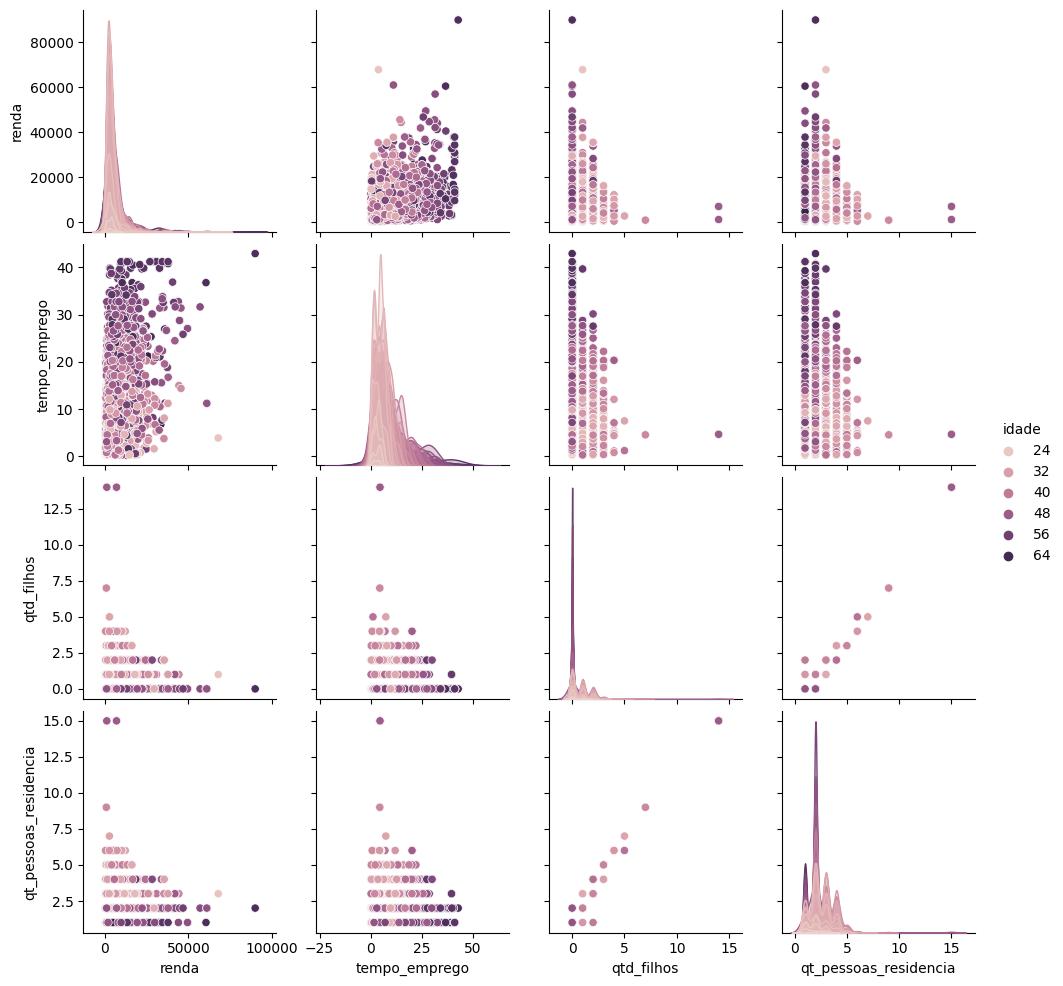

In [67]:
sns.pairplot(df_raw, hue="idade")

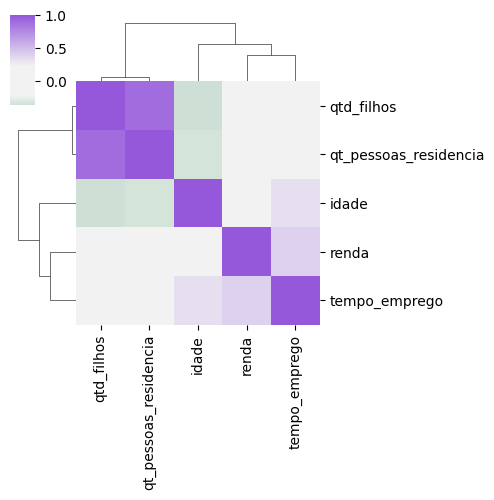

In [92]:
cmap = sns.diverging_palette(h_neg=500, h_pos=1000, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df_raw.corr(),figsize=(5,5), cmap=cmap, center=0)

Pela analise da matriz as variáveis que possuem melhor correlação com renda é ``idade`` e ``tempo_emprego``

#### 2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

Variável ``idade``

<Axes: xlabel='renda', ylabel='idade'>

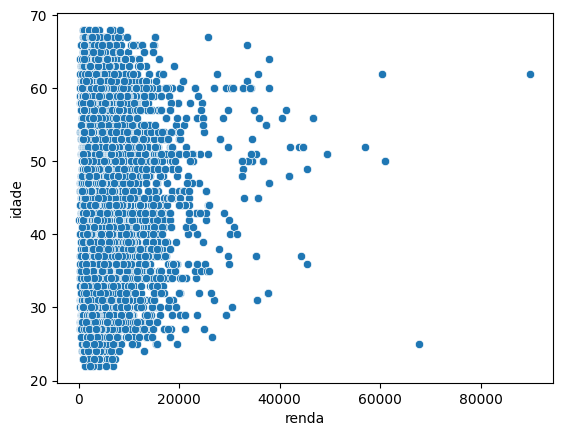

In [97]:
sns.scatterplot(x="renda", y="idade", data=df_raw)

Variável ``tempo_emprego``

<Axes: xlabel='renda', ylabel='tempo_emprego'>

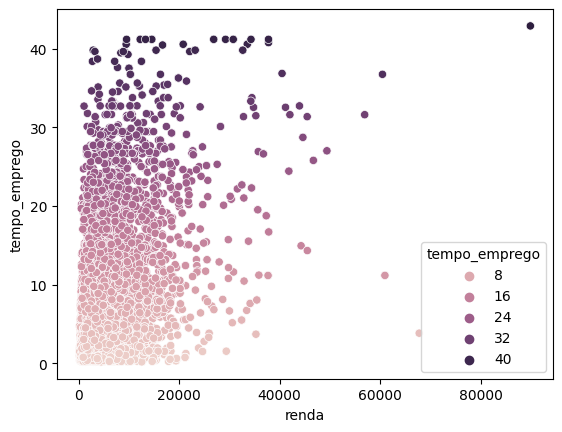

In [110]:
sns.scatterplot(x="renda", y="tempo_emprego", data=df_raw, hue="tempo_emprego")

<Axes: xlabel='idade', ylabel='renda'>

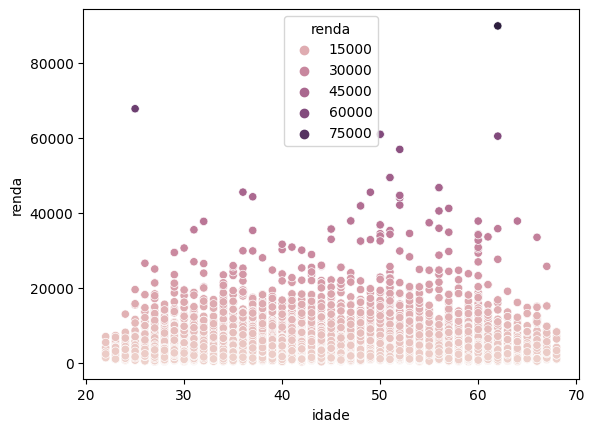

In [108]:
sns.scatterplot(x="idade", y="renda", data=df_raw, hue="renda")

#### 3) Na su aopinião, há outliers na variável renda?

sim, pelo o que mostra na analise, valores de renda acima de 80.000,00 são outliers

In [112]:
df[df["renda"] >= 80000]

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
9934,2015-10-01,F,False,True,0,Empresário,Secundário,Casado,Casa,62,42.906849,2.0,89918.04


#### 4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [120]:
df_raw["renda"] = np.log(df_raw["renda"])

<Axes: xlabel='idade', ylabel='renda'>

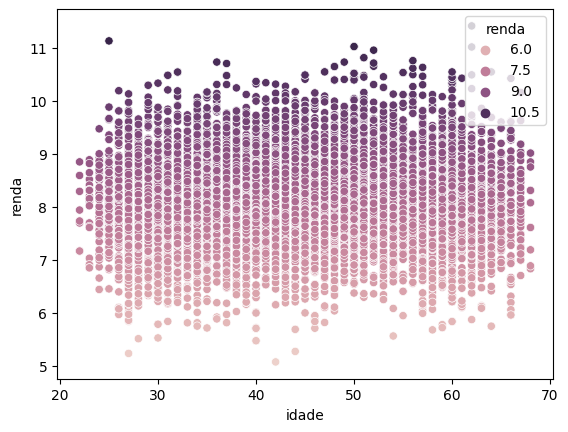

In [122]:
sns.scatterplot(x="idade", y="renda", data=df_raw, hue="renda")

<Axes: xlabel='renda', ylabel='tempo_emprego'>

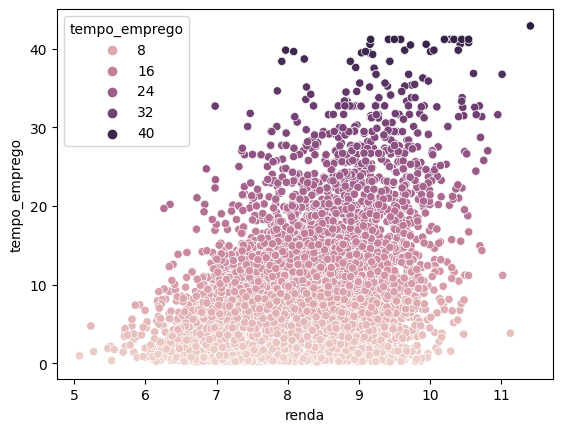

In [123]:
sns.scatterplot(x="renda", y="tempo_emprego", data=df_raw, hue="tempo_emprego")

#### 5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Melhorou bastante